In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

#hotel_bookings = pd.read_csv('/home/jovyan/hotel_bookings(1).csv')
hotel_bookings = pd.read_csv('hotel_bookings.csv')

In [3]:
# Calling the dataset

hotel_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
5,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
6,Resort Hotel,0.0,0.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03/07/2015
7,Resort Hotel,0.0,9.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03/07/2015
8,Resort Hotel,1.0,85.0,2015.0,July,27.0,1.0,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06/05/2015
9,Resort Hotel,1.0,75.0,2015.0,July,27.0,1.0,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/04/2015


In [4]:
# Checking size 

hotel_bookings.shape

(119394, 32)

In [5]:
# Checking what values are in this column - looking at capitalisation

hotel_bookings['distribution_channel'].unique()

array(['Direct', 'Corporate', 'Travel Agent', 'travel agent', 'Undefined',
       'Global Distribution'], dtype=object)

In [6]:
# Checking what value are in this column - what needs to cleaned

hotel_bookings['is_canceled'].unique()

array([ 0.,  1., nan])

In [7]:
# Selecting my relevant columns & and making a copy so that I can clean the data section

data = hotel_bookings[['distribution_channel', 'is_canceled']].copy()

In [8]:
# Data Cleaning 

data['distribution_channel'] = data['distribution_channel'].str.title()
data['distribution_channel'] = data['distribution_channel'].replace(['', 'Undefined', 'N/A', 'Unknown'], pd.NA)
data.dropna(subset=['distribution_channel'], inplace = True)

In [9]:
# Making sure is_canceled is seen as integers and missing data is cleaned

data['is_canceled'] = data['is_canceled'].fillna(0).astype(int)

In [10]:
# Finding cancellation rate by distribution channel 

cancellation_rates = data.groupby('distribution_channel')['is_canceled'].mean().sort_values()

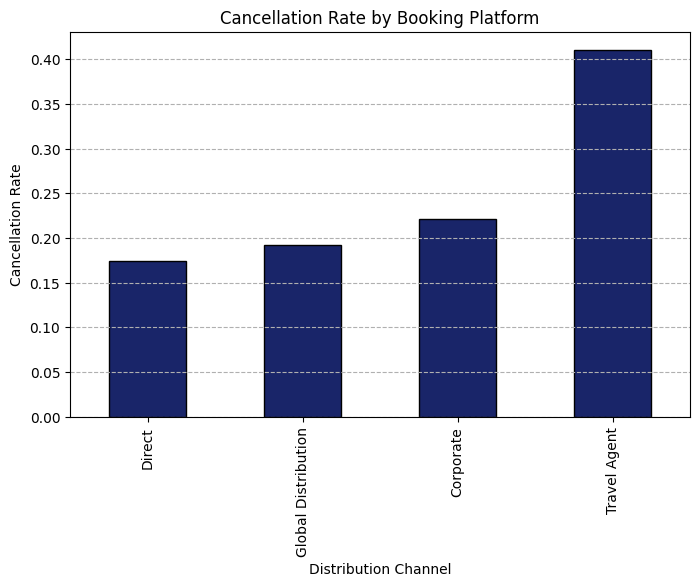

In [11]:
# Making a graph of the results

plt.figure(figsize = (8,5))
cancellation_rates.plot(kind = 'bar', color = '#192569', edgecolor = 'black')
plt.title("Cancellation Rate by Booking Platform")
plt.xlabel("Distribution Channel")
plt.ylabel("Cancellation Rate")
plt.grid(axis = 'y', linestyle = 'dashed')
plt.show()

I decided to address the question ‘How does the platform used for booking influence cancellation rates?’ Hotels can optimise their sales strategies, focusing on some platforms over others to minimise losses, by understanding how different booking platforms impact cancellations. By analysing which platforms have the highest cancellation rates, hotels can adjust their marketing efforts, strategically distributing inventory, and improve customer retention policies. The ‘distribution_channel’ column identifies the platform used for booking, while ‘is_cancelled’ shows whether a booking was cancelled. To guarantee accurate analysis, missing values, such as undefined, N/A and unknown were removed, and data types were adjusted. The analysis reveals that certain platforms have significantly higher cancellation rates than others. This information can guide hotels in managing their policies, adjusting pricing, and refining customer engagement strategies to reduce cancellations. Hotels may also consider implementing stricter booking requirements or deposit policies on high-cancellation platforms. Furthermore, insights from this analysis can help in negotiating better terms with third-party booking providers and prioritising platforms that generate more reliable revenue streams. It can also encourage hotels to prioritise putting rooms on certain platforms. By strategically choosing where to list rooms and adjusting cancellation policies accordingly, hotels can enhance stability of revenue, improve occupancy forecasting, and optimise their overall efficiency.

Overall mark: 58

#### Business Question:
A relevant business question is clearly identified. The significance of answering the question is explained. The findings and implications derived from the data analysis is insightful, though the use of data is relatively simple. The business question itself is straightforward to answer, which limits the potential to explor the dataset further.

<u>Good</u>

#### Data:
Two key variables, 'distributional_channel' and 'is_canceled', are effectively identified to answer the question. Appropriate data filtering and grouping are used, showing good understanding of data manipulation. However, since the use of variables is not comprehensive, the data analysis provides limited insights. Improvements could include employing more relevant variables.

<u>Good</u>

#### Visualization:
A baisc bar chart is used for the visualization purpose, with essential elements of the title, axis labels and ticks. Consider to use different plot types to show your findings. The visualization technique is relatively simple based on the plot. Improvements could inlcude adding annotations and legends where possible.

<u>Pass</u>

#### Code:
The code structure is clean and easy to follow. There are no obvious errors, except a minor issue in importing data ('/home/jovyan/hotel_bookings(1).csv' works only on your machine. You should use the standard file name when your code is sharing with others.). The coding technique is relatively simple as well, however, the code is well-organized and come with comments.

<u>Good</u>